# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [4]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [6]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Load the image file of dataset
images = np.load('images.npy')      

# Load the labels file of dataset
labels = pd.read_csv('Labels.csv')  

## Data Overview

### Understand the shape of the dataset

In [8]:
print(images.shape)         
print(labels.shape)         

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128x128x3, each image having 3 channels

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

## Plotting random images from each of the class

In [9]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

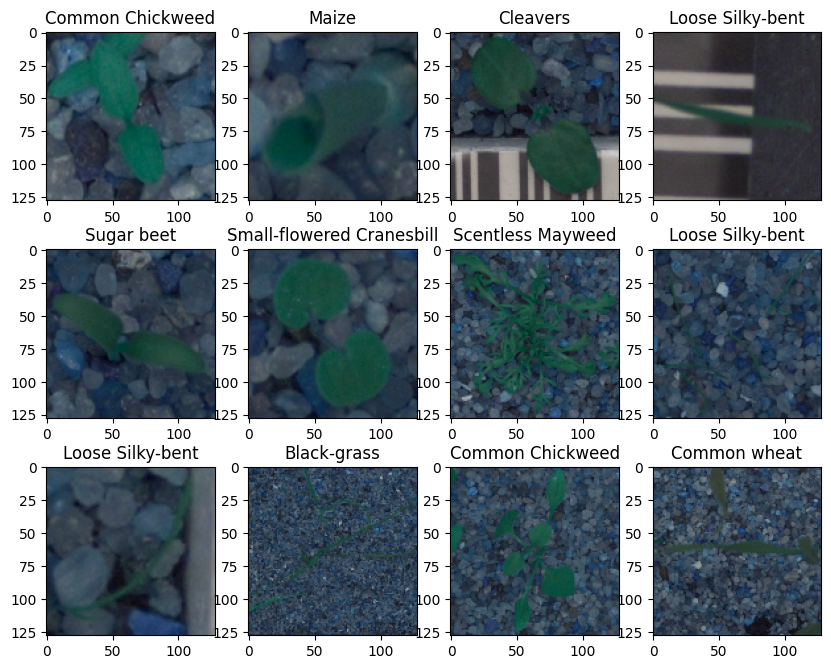

In [10]:
plot_images(images,labels) 

## Checking the distribution and data imbalances

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

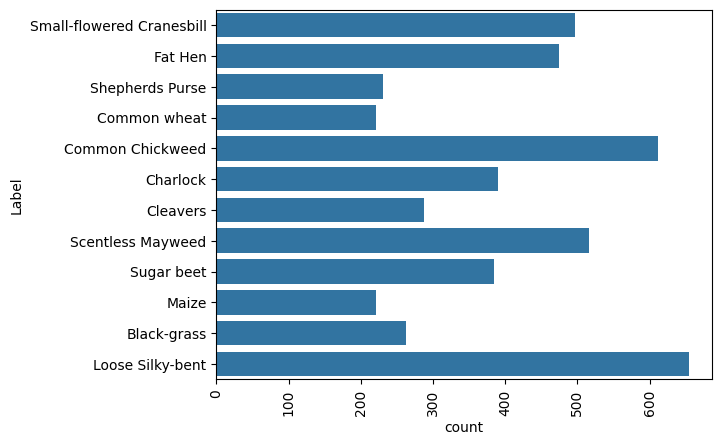

In [11]:
sns.countplot(labels['Label'])            
plt.xticks(rotation='vertical')

### Observation
* Data is quite balanced, with an average of nearly 265 images per category

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
images_decreased=[]
##Reduce the height and wideth to 64
height = 64                    
width =  64                    
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [14]:
# split the data with test_size as 0.1
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels) 
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)                       

In [15]:
# Check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [16]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()                                        
y_train_encoded = enc.fit_transform(y_train)        
y_val_encoded=enc.transform(y_val)                  
y_test_encoded=enc.transform(y_test)               

In [17]:
# check the shape of train, validation and test data
y_train_encoded.shape,y_val_encoded.shape, y_test_encoded.shape   

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [18]:
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [19]:
# Clearing backend
backend.clear_session()

In [20]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [21]:
# Intializing a sequential model
model1 = Sequential()                           

# Add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Use the Adam Optimizer
opt=Adam()

# Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

#### Fitting the model on the train data

In [22]:
# Fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 10s - loss: 2.4558 - accuracy: 0.1055 - val_loss: 2.4380 - val_accuracy: 0.1379 - 10s/epoch - 83ms/step
Epoch 2/30
121/121 - 9s - loss: 2.4365 - accuracy: 0.1323 - val_loss: 2.4261 - val_accuracy: 0.1379 - 9s/epoch - 76ms/step
Epoch 3/30
121/121 - 11s - loss: 2.3676 - accuracy: 0.1788 - val_loss: 2.1344 - val_accuracy: 0.3435 - 11s/epoch - 90ms/step
Epoch 4/30
121/121 - 9s - loss: 2.1303 - accuracy: 0.2922 - val_loss: 1.9725 - val_accuracy: 0.3458 - 9s/epoch - 78ms/step
Epoch 5/30
121/121 - 9s - loss: 1.9939 - accuracy: 0.3169 - val_loss: 1.8637 - val_accuracy: 0.3879 - 9s/epoch - 74ms/step
Epoch 6/30
121/121 - 9s - loss: 1.9430 - accuracy: 0.3200 - val_loss: 1.6829 - val_accuracy: 0.4439 - 9s/epoch - 76ms/step
Epoch 7/30
121/121 - 9s - loss: 1.9000 - accuracy: 0.3161 - val_loss: 1.6858 - val_accuracy: 0.4743 - 9s/epoch - 73ms/step
Epoch 8/30
121/121 - 9s - loss: 1.8686 - accuracy: 0.3312 - val_loss: 1.5744 - val_accuracy: 0.4626 - 9s/epoch - 78ms/step
Epoch 9/30
1

**Model Evaluation**

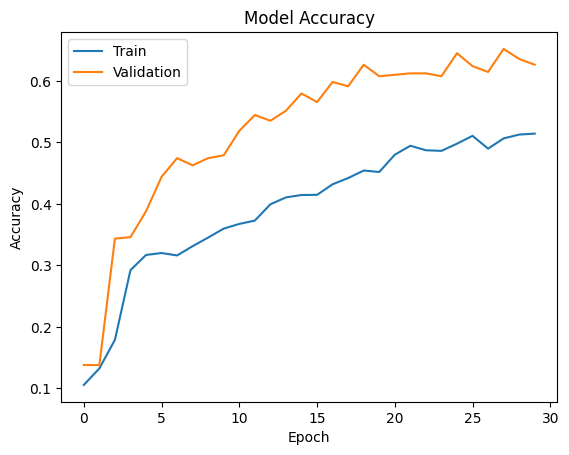

In [23]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations ###
* The accuracy of both the Training and Validation set are increasing
* The model seems to overfit the data

**Evaluate the model on the Test data**

In [24]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    

15/15 - 0s - loss: 1.1481 - accuracy: 0.6168 - 389ms/epoch - 26ms/step


**Plotting the Confusion Matrix**
*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

In [25]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)         

15/15 [==============================] - 0s 16ms/step


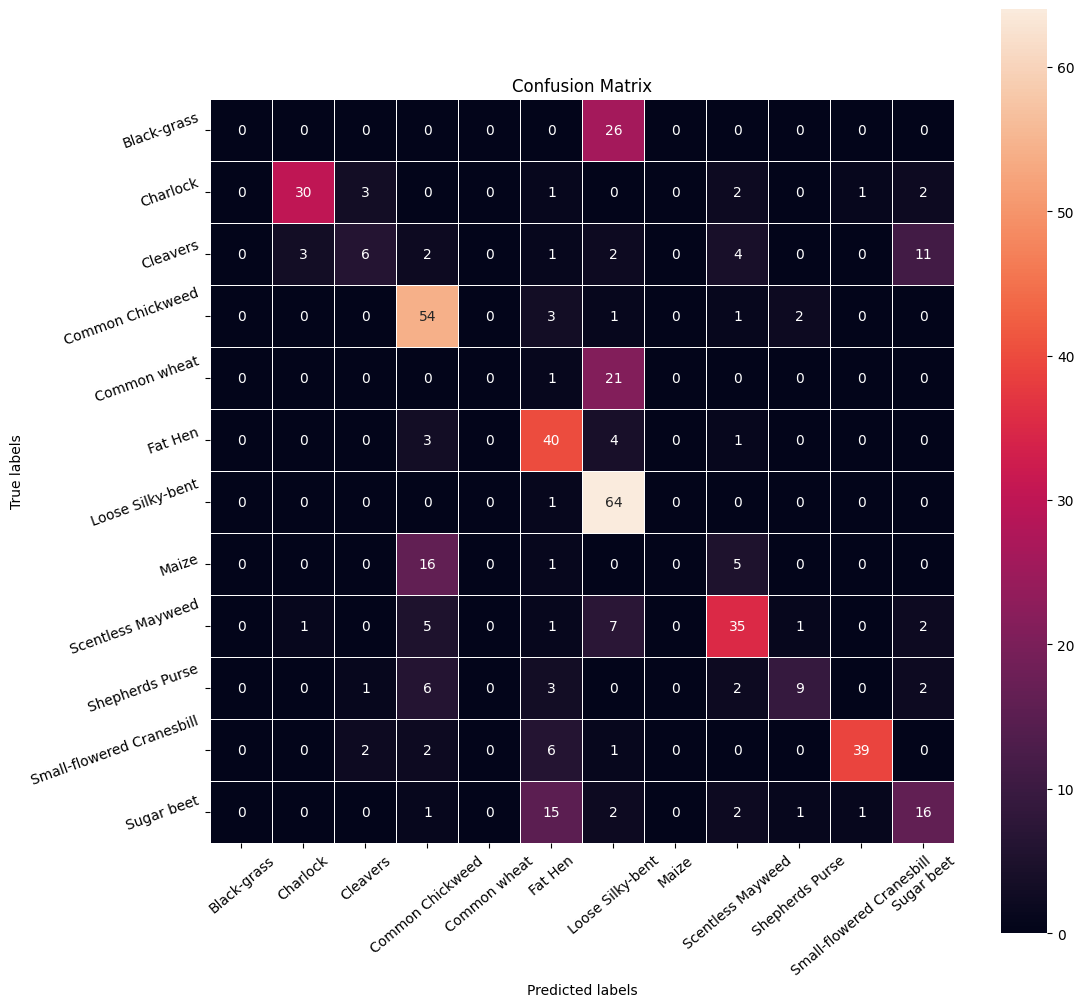

In [26]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [27]:
from sklearn.metrics import classification_report
# Plotting the classification report
cr =  classification_report(y_test_arg,y_pred_arg)     
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.88      0.77      0.82        39
           2       0.50      0.21      0.29        29
           3       0.61      0.89      0.72        61
           4       0.00      0.00      0.00        22
           5       0.55      0.83      0.66        48
           6       0.50      0.98      0.66        65
           7       0.00      0.00      0.00        22
           8       0.67      0.67      0.67        52
           9       0.69      0.39      0.50        23
          10       0.95      0.78      0.86        50
          11       0.48      0.42      0.45        38

    accuracy                           0.62       475
   macro avg       0.49      0.50      0.47       475
weighted avg       0.55      0.62      0.56       475



### Observations: ##


*   We can see from the above plot that **both the Training and Validation accuracies are good but there is a mismatch between their values.**
*   The model needs to be improved 




## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [28]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [29]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

**Creating the model based on the augmented data**

In [31]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Adam Optimimzer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [32]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction]
                    )

Epoch 1/30
60/60 [==============================] - 12s 188ms/step - loss: 2.1471 - accuracy: 0.2456 - val_loss: 2.4125 - val_accuracy: 0.2336 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 11s 180ms/step - loss: 1.6902 - accuracy: 0.4153 - val_loss: 2.2866 - val_accuracy: 0.2290 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 12s 199ms/step - loss: 1.4968 - accuracy: 0.4782 - val_loss: 2.1965 - val_accuracy: 0.2290 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 10s 163ms/step - loss: 1.3863 - accuracy: 0.5197 - val_loss: 2.0569 - val_accuracy: 0.4252 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 10s 172ms/step - loss: 1.2940 - accuracy: 0.5464 - val_loss: 1.7450 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 10s 168ms/step - loss: 1.2105 - accuracy: 0.5739 - val_loss: 1.6216 - val_accuracy: 0.6425 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 10s 166ms/st

**Model Evaluation**

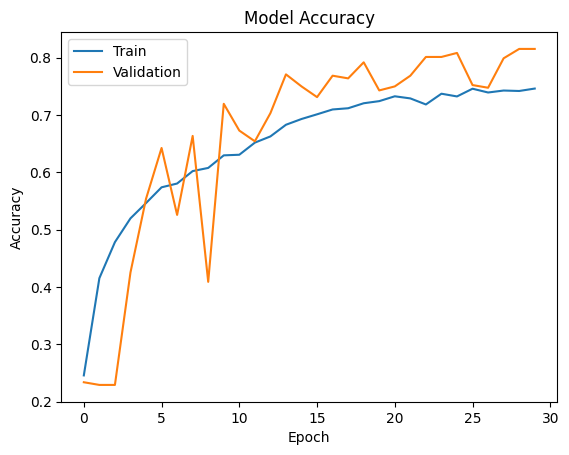

In [33]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate on Test data**

In [34]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  

15/15 - 0s - loss: 0.6742 - accuracy: 0.8042 - 291ms/epoch - 19ms/step


**Plot the Confusion matrix**

In [35]:
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 26ms/step


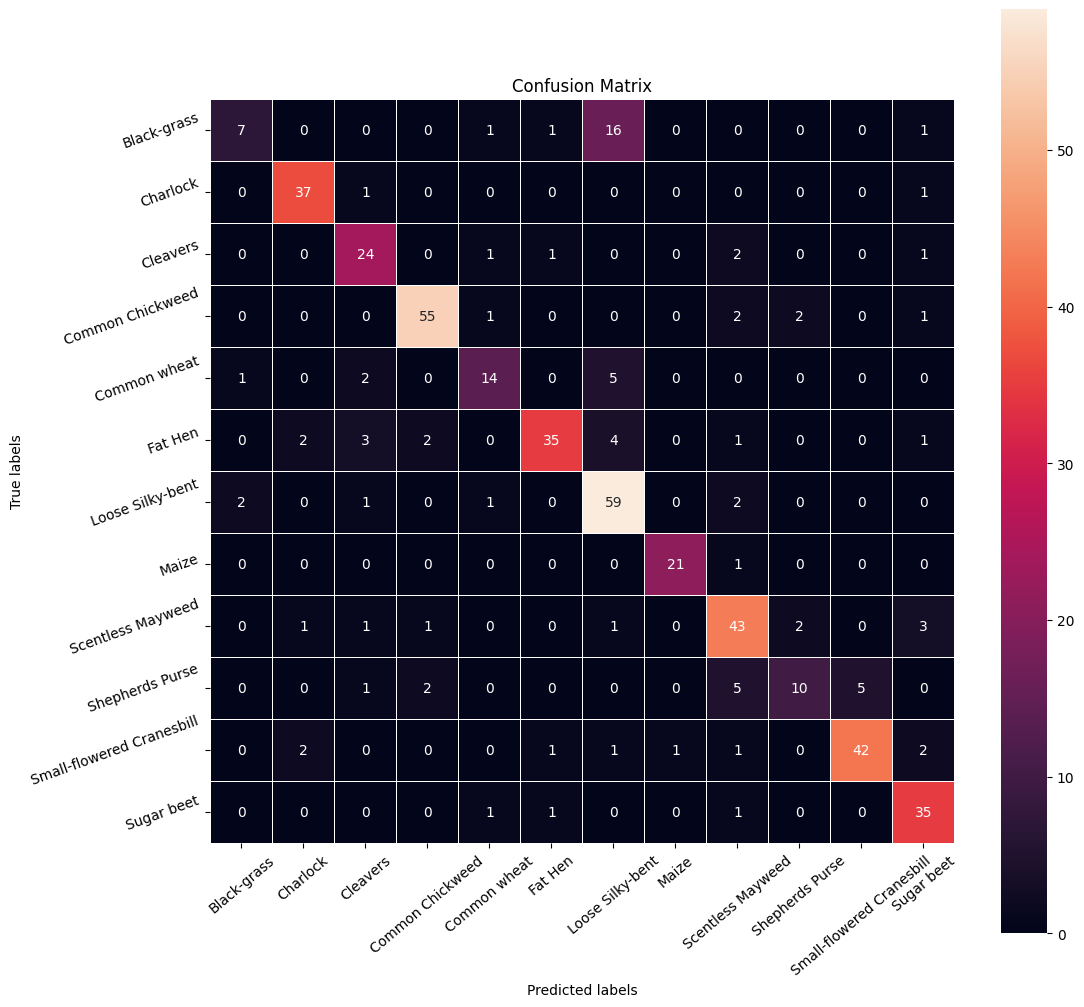

In [36]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [37]:
cr=classification_report(y_test_arg,y_pred_arg)     
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.27      0.39        26
           1       0.88      0.95      0.91        39
           2       0.73      0.83      0.77        29
           3       0.92      0.90      0.91        61
           4       0.74      0.64      0.68        22
           5       0.90      0.73      0.80        48
           6       0.69      0.91      0.78        65
           7       0.95      0.95      0.95        22
           8       0.74      0.83      0.78        52
           9       0.71      0.43      0.54        23
          10       0.89      0.84      0.87        50
          11       0.78      0.92      0.84        38

    accuracy                           0.80       475
   macro avg       0.80      0.77      0.77       475
weighted avg       0.81      0.80      0.79       475



### Observations on the Improved Model ###

* The model is giving **80% accuracy** on the test data **comparable to the accuracy of the validation data**. This implies that the model is giving generalized performance
* The model is majorly confused between **Black-grass and Loose Silky-bent**. This implies that the **model might be focused on features related to shapes and sizes but not deep features of objects** that can help to distinguish between the two categories
* Consequently, **precision also has a high range with the 'Black-grass' class having the least precision**
* The **highest precision is for the 'Loose Silky-bent' class**, which implies that the model is able to distinguish it from all other classes.

## Final Model

* The improved model is 80% accurate as compared to the base model's 62% accuracy


### Visualizing the prediction

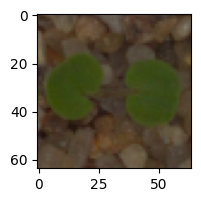

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


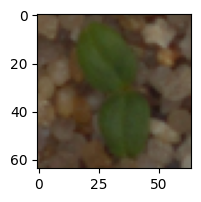

1/1 [==============================] - 0s 14ms/step
Predicted Label ['Cleavers']
True Label Cleavers


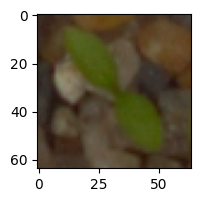

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


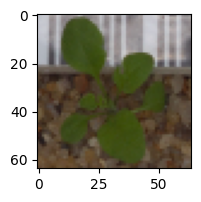

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [38]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

* We can observe from the confusion matrix of all the models that our data-augmented improved model was the better model because it predicted the majority of the classes better than the other models.
* The test accuracy of the improved model is 80%.
* Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
* More data on Black-grass can also help increasing the accuracy of the model, given that the model showed evidence of confusion with this category
* The model is ready for generalized performance with known gap of "black-grass" category.

**Thank you!**

_____